<a href="https://colab.research.google.com/github/PaulFBR/Analise-De-Dados/blob/main/Padr%C3%B5es_e_Tend%C3%AAncias_da_Dengue_em_Joinville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Padrões e Tendências da Dengue em Joinville**

# Resumo:

A dengue permanece como um desafio de saúde pública, representando uma ameaça significativa para comunidades em todo o mundo. Essa doença transmitida por mosquitos Aedes aegypti causa preocupação constante, dada as suas implicações para a saúde e os recursos necessários para seu controle. Joinville, como uma a maior cidade do estado, enfrenta desafios únicos no controle e prevenção dessa doença, devido a sua densidade populacional, características ambientais e diferenças socioeconômicas. Por meio de dados, buscamos entender a situação atual da dengue em Joinville, e também identificar padrões, tendências e fatores associados à sua incidência. Usando a análise de dados, esperamos fornecer insights valiosos que possam ajudar com estratégias e ser eficazes tanto na prevenção como no controle do mosquito, contribuindo assim para um melhor monitoramento da dengue na cidade de Joinville.


# Introdução

Esta pesquisa aborda a análise dos dados do vírus da dengue em Joinville, cidade localizada no estado de Santa Catarina, utilizando dados reais, coletados por alunos da turma de Análise de Dados em 2024 da Unisociesc, para identificar padrões, tendências e fatores determinantes para a difusão da doença.
Buscando compreender a dinâmica da dengue, o estudo visa fornecer insights que ajudem a formar estratégias de prevenção e controle, coletamos tanto informações sociais quanto variáveis socioeconômicas, ambientais e demográficas para ajudar na tomada de decisões e no desenvolvimento de possíveis estratégias que sejam eficazes ao combate da doença.


# Origem dos dados

A dengue é uma doença febril aguda, sistêmica e dinâmica, variando desde casos assintomáticos a quadros graves, inclusive óbitos. Nos casos sintomáticos pode apresentar três fases clínicas: febril, crítica e de recuperação crítica da doença, iniciando com sinais de alarme.
Joinville é um município localizado na região norte do estado de Santa Catarina. Sua população, 616.323 habitantes, conforme censo de 2022 disponibilizado pelo IBGE, sendo a maior cidade do estado, possuindo uma área de 1.126,106 km².
O município de Joinville está em situação permanente de atenção devido ao número de casos elevados e dos óbitos já registrados. Com isso, novas estratégias que já estavam no plano estão sendo colocadas em práticas para o enfrentamento da doença.
Neste ano, Joinville confirmou 27,9 mil casos de dengue. Destes, 40 pessoas perderam a vida em 2024. Os bairros Aventureiro, Costa e Silva e Boa Vista são os bairros que mais tiveram casos confirmados.


# O Banco de Dados Utilizado

O banco de dados utilizado foi um arquivo em excel (.xlsx) no qual os dados foram computados através de um formulário, preenchido por pessoas da cidade de Joinville, no excel utilizamos colunas e linhas para a estruturação dos dados. A base de dados utilizada contém 50 colunas e 161 linhas, originando 8.050 dados. As informações mais utilizadas nesta análise serão:


Informações Pessoais;
Informações sociais;
Informações socioeconômicas;

Questionários sobre a doença para avaliarmos o conhecimento popular sobre a doença.


# Gráficos Utilizados no Power BI


Gráfico de Área
O gráfico é baseado em um gráfico de linhas, onde a área entre os eixos e a linha é preenchida. Os gráficos de área enfatizam a magnitude ao longo do tempo e podem ser usados para chamar a atenção para o valor total de uma tendência. Por exemplo, os dados que representam o lucro ao longo do tempo podem ser plotados em um gráfico de área para enfatizar o lucro total.

Gráfico de Linhas
Os gráficos de linhas enfatizam a forma geral de toda a série de valores, geralmente ao longo do tempo.


Pizza
Os gráficos de pizza mostram a relação entre as partes e o todo. Eles provêem uma visão rápida da distribuição proporcional dos dados.


# Análises dos Gráficos



```
SELECT
    FE.FAIXA_ETÁRIA,
    COUNT(*) AS QUANTIDADE
FROM FORMULARIO_TRATADO FT

INNER JOIN FAIXA_ETARIA FE ON FE.CODIGO_FAIXA = FT.CODIGO_FAIXA

GROUP BY FE.FAIXA_ETÁRIA
ORDER BY FE.FAIXA_ETÁRIA ASC;


```



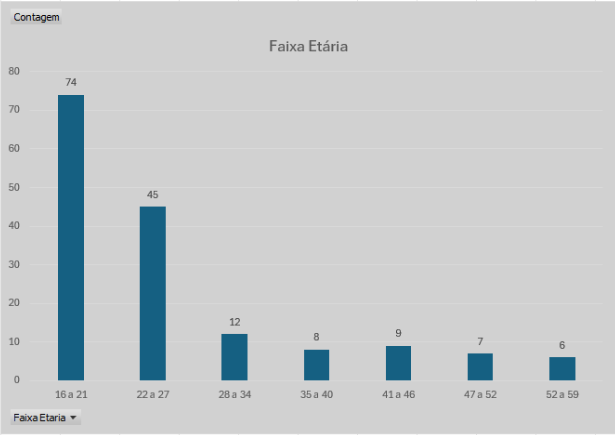

Neste primeiro gráfico temos as informações de faixa etária dos respondentes do formulário, podemos observar, é que a maioria dos respondentes, são jovens entre 16 a 27 anos, sendo esses 2, totalizando 74% dos respondentes.



```
SELECT
    G.GENERO,
    COUNT(*) AS QUANTIDADE,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM FORMULARIO_TRATADO), 2) AS PORCENTAGEM
FROM FORMULARIO_TRATADO FT
INNER JOIN GENERO G ON G.CODIGO_GENERO = FT.CODIGO_GENERO
GROUP BY G.GENERO
ORDER BY G.GENERO ASC;
```



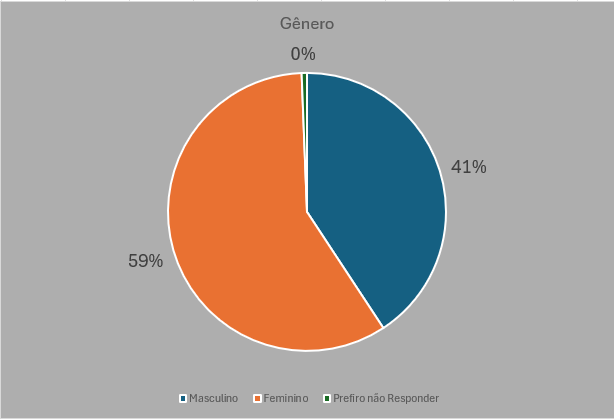

Complementando a informação de cima temos um gráfico em pizza que mostra o género dos nossos respondentes, temos uma pequena variação para cima do grupo feminino, tendo 18% a mais dos respondentes.



```
SELECT
    R.BAIRRO_RESIDÊNCIA,
    COUNT(*) AS QUANTIDADE
    
FROM FORMULARIO_TRATADO FT

INNER JOIN REGIÃO R ON R.CODIGO_REGIAO = FT.CODIGO_REGIAO AND R.CODIGO_BAIRRO = FT.CODIGO_BAIRRO


WHERE CONTRAIU_DENGUE = 'SIM'

GROUP BY R.BAIRRO_RESIDÊNCIA
ORDER BY QUANTIDADE DESC, R.BAIRRO_RESIDÊNCIA ASC;
```



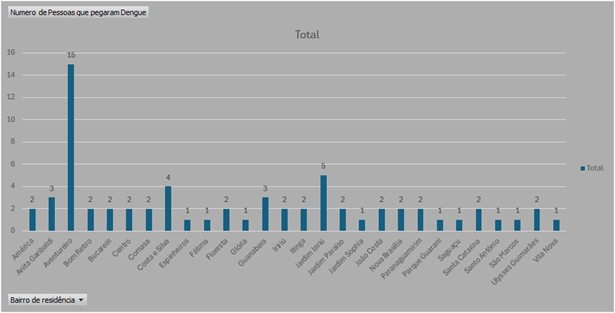

Neste segundo gráfico, temos uma relação do tanto de pessoas que já contraíram a doença, de acordo com o bairro em que ela mora, das 161 respostas que tivemos, apenas 67 já contraíram a doença, dessas 67, 15 moram no bairro aventureiro.



```
SELECT
    FT.CONTRAIU_DENGUE AS CONTRAIU_DENGUE,
    COUNT(*) AS QUANTIDADE,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM FORMULARIO_TRATADO WHERE CONTRAIU_DENGUE IS NOT NULL), 2) AS PORCENTAGEM
FROM FORMULARIO_TRATADO FT
WHERE FT.CONTRAIU_DENGUE IS NOT NULL
GROUP BY FT.CONTRAIU_DENGUE
ORDER BY CONTRAIU_DENGUE ASC;
```



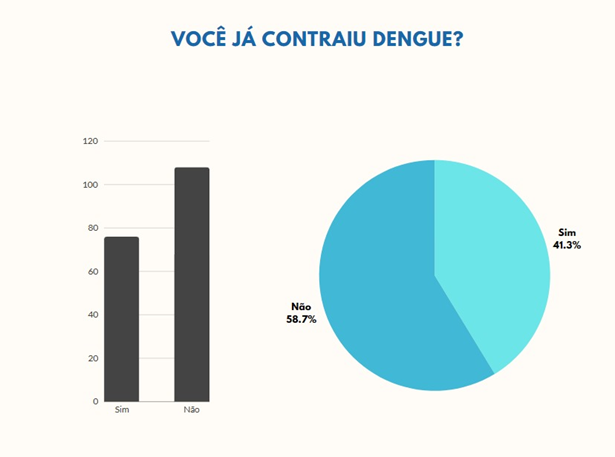

 A maioria significativa dos participantes (83.70%) está familiarizada com os sintomas da dengue, indicando a eficácia das campanhas de conscientização em Joinville. No entanto, 16.30% ainda não conhecem os sintomas, destacando a necessidade de intensificar a divulgação e a educação sobre a doença.



```
SELECT
    FAMILIARIDADE_SINTOMAS_DENGUE,
    COUNT(*) AS QUANTIDADE,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM FORMULARIO_TRATADO), 2) AS PORCENTAGEM
FROM
    FORMULARIO_TRATADO
GROUP BY
    FAMILIARIDADE_SINTOMAS_DENGUE;
```



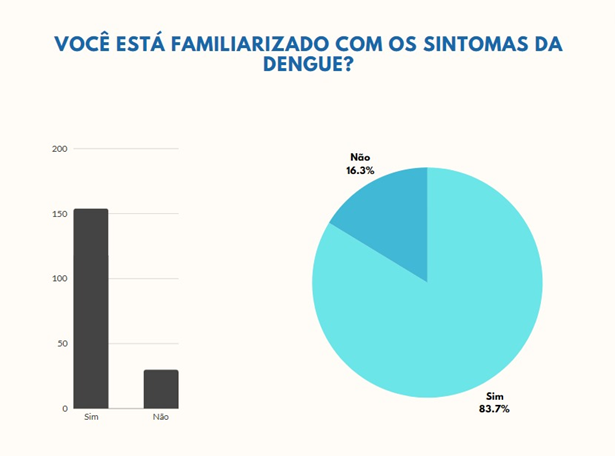

41.30% dos entrevistados afirmaram já ter contraído dengue, enquanto 58.70% não tiveram a doença. A alta porcentagem de infecções é preocupante e aponta para uma significativa incidência da dengue em Joinville, evidenciando a necessidade de medidas preventivas mais eficazes e contínuas.

Os resultados indicam que, embora a maioria dos moradores de Joinville conheça os sintomas da dengue, a cidade ainda enfrenta um desafio considerável com a alta taxa de infecção. O conhecimento elevado sobre os sintomas é positivo, mas a alta incidência da doença destaca a necessidade de melhorar as estratégias de prevenção e controle do mosquito transmissor.




```
SELECT
    M.TIPO_DE_MORADIA,
    FT.TERRENO_BALDIO_PROXIMO,
    COUNT(CASE WHEN FT.CONTRAIU_DENGUE = 'Sim' THEN 1 END) AS PESSOAS_PEGARAM_DENGUE
FROM FORMULARIO_TRATADO FT
INNER JOIN MORADIA M ON M.CODIGO_MORADIA = FT.CODIGO_MORADIA
WHERE FT.TERRENO_BALDIO_PROXIMO IS NOT NULL
GROUP BY M.TIPO_DE_MORADIA, FT.TERRENO_BALDIO_PROXIMO;
```



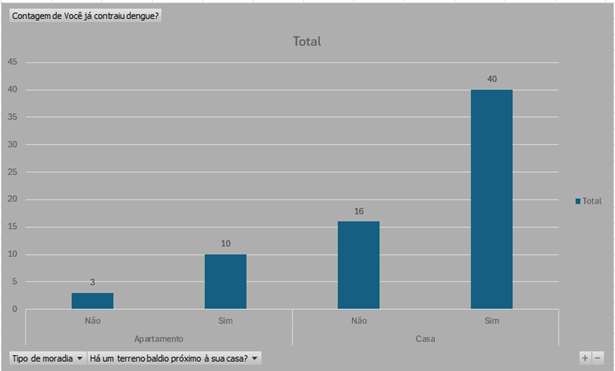

Nesse gráfico, temos uma relação da quantidade de pessoas que pegaram dengue, de acordo com o seu tipo de moradia, junto com a relação de se há um terreno baldio perto de sua residência, primeira consideração que conseguimos fazer, é que grande parte das pessoas que contraíram a doença moram em casas, 81% das pessoas moram em casa, contra apenas 19 % em apartamento, desses 81%, 71% das pessoas tem um terreno baldio perto de sua residência, conseguimos concluir que terrenos baldios podem aumentar o foco da dengue pela região, e que pessoas que moram em casa estão mais propícias a contrair a doença.

# Fontes



Banco de Dados Utilizado:
https://docs.google.com/spreadsheets/d/1zZ049kLJE-_WEB2SLFTYc8nWy-Lc9clpWYGP4p9hu2Y/edit?usp=sharing

Censo de 2022 (quantidade de habitantes): https://www.joinville.sc.gov.br/noticias/censo-2022-aponta-que-joinville-tem-616-323-moradores/

Fonte Área da unidade territorial (km²) de Joinville: https://estado.sc.gov.br/conheca-sc/geografia/

Fonte dos dados sobre a Dengue em Joinville: https://www.joinville.sc.gov.br/noticias/secretaria-da-saude-divulga-resultados-de-investigacoes-epidemiologicas-dos-obitos-por-dengue/